In [ ]:
import pandas as pd
import random
import numpy as np

# Configuración para que sea reproducible
random.seed(42)

# --- 1. Generador de Datos Sucios ---
n_filas = 1000
data = []

categorias = ['Hardware', 'Software', 'Redes', 'Acceso', 'Impresora']
# Introducimos errores de dedo intencionales (Typos)
categorias_sucias = ['Hardwre', 'Softwar', 'Redds', 'Aceso', 'Impresora']

departamentos = ['Ventas', 'Contabilidad', 'IT', 'Logística', 'Dirección']

for i in range(n_filas):
    # Generar ID (haremos que algunos se repitan después)
    ticket_id = f"TICK-{1000 + i}"

    # Generar Categoría (10% de probabilidad de error de escritura)
    if random.random() < 0.1:
        cat = random.choice(categorias_sucias)
    else:
        cat = random.choice(categorias)

    # Generar Prioridad (15% de probabilidad de que esté vacía/NaN)
    if random.random() < 0.15:
        prio = np.nan
    else:
        prio = random.choice(['Alta', 'Media', 'Baja'])

    # Generar Tiempo de Resolución (con algunos valores imposibles como negativos)
    if random.random() < 0.05:
        horas = random.randint(-10, 0) # Error lógico: tiempo negativo
    elif random.random() < 0.02:
        horas = random.randint(500, 1000) # Outlier: tardaron 1000 horas
    else:
        horas = random.randint(1, 48) # Normal

    # Armamos la fila
    fila = {
        'ID_Ticket': ticket_id,
        'Departamento': random.choice(departamentos),
        'Categoria': cat,
        'Prioridad': prio,
        'Horas_Resolucion': horas,
        'Calificacion_Usuario': random.randint(1, 5)
    }
    data.append(fila)

# --- 2. Crear DataFrame y añadir Duplicados ---
df_sucio = pd.DataFrame(data)

# Vamos a duplicar 50 filas al azar para ensuciarlo más
duplicados = df_sucio.sample(n=50)
df_final = pd.concat([df_sucio, duplicados], ignore_index=True)

# Mezclamos todo
df_final = df_final.sample(frac=1).reset_index(drop=True)

# --- 3. Guardar y Mostrar ---
print(f"¡Generado dataset con {len(df_final)} filas!")
print("Primeras 10 filas (observa los errores):")
display(df_final.head(10))

# Guardar en CSV para descargar si quieres
df_final.to_csv('tickets_soporte_sucio.csv', index=False)

¡Generado dataset con 1050 filas!
Primeras 10 filas (observa los errores):


,ID_Ticket,Departamento,Categoria,Prioridad,Horas_Resolucion,Calificacion_Usuario
0,TICK-1708,Logística,Software,Alta,27,2
1,TICK-1434,Dirección,Hardware,Alta,27,4
2,TICK-1642,Logística,Impresora,Baja,42,1
3,TICK-1128,Contabilidad,Hardwre,Media,35,4
4,TICK-1611,Contabilidad,Hardware,Baja,15,1
5,TICK-1778,Dirección,Acceso,Alta,4,2
6,TICK-1462,Logística,Acceso,Media,706,1
7,TICK-1069,Ventas,Software,Baja,43,5
8,TICK-1553,IT,Software,Alta,22,2
9,TICK-1376,IT,Acceso,Alta,18,4


Detectar y eliminar duplicados:

In [ ]:
print(df_final.duplicated().sum()) #duplicated() sirve para devolver datos sin duplicar, ( [ 3 , - 1 , 5 , - 1 , 2 , 1 , 3 , 2 , 1 , 5 , - 2 , 1 , 2 ] ) = [ 3 -1 5 2 1 -2]
                                  #.sum() suma todo tu resultado

0


In [ ]:
df_final = df_final.drop_duplicates()

In [ ]:
# 1. Volvemos a contar duplicados (Debe salir 0)
print(f"Duplicados actuales: {df_final.duplicated().sum()}")

# 2. Revisamos las dimensiones de la tabla (Filas, Columnas)
# Antes eran 1050, ahora deberían ser 1000
print(f"Tamaño de la tabla: {df_final.shape}")

Duplicados actuales: 0
Tamaño de la tabla: (1000, 6)


Manejamos valores vacíos donde la columna Prioridad tiene huecos y los rellenamos con "desconocidos" para no perder informacion

In [ ]:
print(df_final.isnull().sum()) #isnull() sirve para devolver datos sin informacion
                               #.sum() suma todo tu resultado

ID_Ticket                 0
Departamento              0
Categoria                 0
Prioridad               146
Horas_Resolucion          0
Calificacion_Usuario      0
dtype: int64


In [ ]:
# Rellenamos los valores vacíos (NaN) con "Desconocida"
df_final['Prioridad'] = df_final['Prioridad'].fillna('Desconocida')

# Verificamos de nuevo (ahora Prioridad debería marcar 0 vacíos)
print(df_final.isnull().sum())

ID_Ticket               0
Departamento            0
Categoria               0
Prioridad               0
Horas_Resolucion        0
Calificacion_Usuario    0
dtype: int64


Correccion de errores de dedo

In [ ]:
# Ver qué categorías raras existen
print(df_final['Categoria'].unique())

['Software' 'Hardware' 'Impresora' 'Hardwre' 'Acceso' 'Redes' 'Softwar'
 'Redds' 'Aceso']


In [ ]:
# 1. Creamos el diccionario de correcciones { "Error" : "Correcto" }
correcciones = {
    'Hardwre': 'Hardware',
    'Softwar': 'Software',
    'Redds': 'Redes',
    'Aceso': 'Acceso'
}

# 2. Aplicamos el reemplazo en la columna Categoria
df_final['Categoria'] = df_final['Categoria'].replace(correcciones)

# 3. Verificamos que la lista quede limpia
print("Categorías corregidas:")
print(df_final['Categoria'].unique())

Categorías corregidas:
['Software' 'Hardware' 'Impresora' 'Acceso' 'Redes']


In [ ]:
# Ver el resumen numérico
print(df_final['Horas_Resolucion'].describe()) #.describe() sirve para genera un resumen estadístico descriptivo de una serie de datos

count    1000.000000
mean       32.228000
std        81.319991
min       -10.000000
25%        11.000000
50%        24.000000
75%        37.000000
max       988.000000
Name: Horas_Resolucion, dtype: float64


In [ ]:
# 1. Aplicamos el filtro: (Mayor o igual a 0 horas) Y (Menor o igual a 100 horas)
df_final = df_final[ (df_final['Horas_Resolucion'] >= 0) & (df_final['Horas_Resolucion'] <= 100) ]

# 2. Verificamos de nuevo las estadísticas
print("--- Estadísticas después de la limpieza ---")
print(df_final['Horas_Resolucion'].describe())

--- Estadísticas después de la limpieza ---
count    946.000000
mean      24.538055
std       13.850721
min        0.000000
25%       12.000000
50%       24.500000
75%       37.000000
max       48.000000
Name: Horas_Resolucion, dtype: float64


In [ ]:
from google.colab import files

# 1. Guardamos el DataFrame limpio
df_final.to_csv('tickets_soporte_LIMPIO.csv', index=False)

print("✅ ¡Archivo limpio guardado con éxito!")
print(f"Total de tickets válidos: {len(df_final)}")

# 2. Descargamos a tu PC
files.download('tickets_soporte_LIMPIO.csv')

✅ ¡Archivo limpio guardado con éxito!
Total de tickets válidos: 946


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

correccion de acentos de python en excell

In [ ]:
# Ver qué departamentos existen realmente en nuestra tabla limpia
print(df_final['Departamento'].unique())

['Logística' 'Dirección' 'Contabilidad' 'Ventas' 'IT']


In [ ]:
from google.colab import files

# Usamos encoding='utf-8-sig' para que Excel lea bien las tildes (Logística, Dirección)
df_final.to_csv('tickets_soporte_LIMPIO_v2.csv', index=False, encoding='utf-8-sig')

print("✅ Archivo corregido (v2) generado.")
files.download('tickets_soporte_LIMPIO_v2.csv')

✅ Archivo corregido (v2) generado.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PASAS A CODIGO DE GITHUB PARA GRAFICAR


In [5]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. REGENERAR DATOS LIMPIOS (Lo mismo que hicimos antes) ---
random.seed(42)
n_filas = 1000
data = []
categorias = ['Hardware', 'Software', 'Redes', 'Accesos', 'Impresora']
departamentos = ['Ventas', 'Contabilidad', 'IT', 'Logística', 'Dirección']

for i in range(n_filas):
    if random.random() < 0.1: cat = 'Hardware' # Simulamos corrección ya hecha
    else: cat = random.choice(categorias)

    prio = random.choice(['Alta', 'Media', 'Baja', 'Desconocida'])
    horas = random.randint(1, 48) # Simulamos datos ya limpios

    fila = {
        'ID_Ticket': f"TICK-{1000 + i}",
        'Departamento': random.choice(departamentos),
        'Categoria': cat,
        'Prioridad': prio,
        'Horas_Resolucion': horas,
        'Calificacion_Usuario': random.randint(1, 5)
    }
    data.append(fila)

df_clean = pd.DataFrame(data)

# --- 2. CONFIGURACIÓN DE DISEÑO PRO (ESTILO GITHUB) ---
# Usamos el estilo 'seaborn-whitegrid' para un fondo limpio con líneas guía suaves
sns.set_style("whitegrid")

# Definimos una paleta de colores corporativa (Azul, Gris, Turquesa)
colores_pro = ["#2c3e50", "#e74c3c", "#3498db", "#95a5a6", "#2ecc71"]
sns.set_palette(colores_pro)

# Configurar tipografía y tamaños globales
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 120 # Alta resolución

print("✅ Datos cargados y Diseño Configurado.")

✅ Datos cargados y Diseño Configurado.


/tmp/ipython-input-3537967941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_clean, x='Departamento', order=df_clean['Departamento'].value_counts().index, palette='viridis')


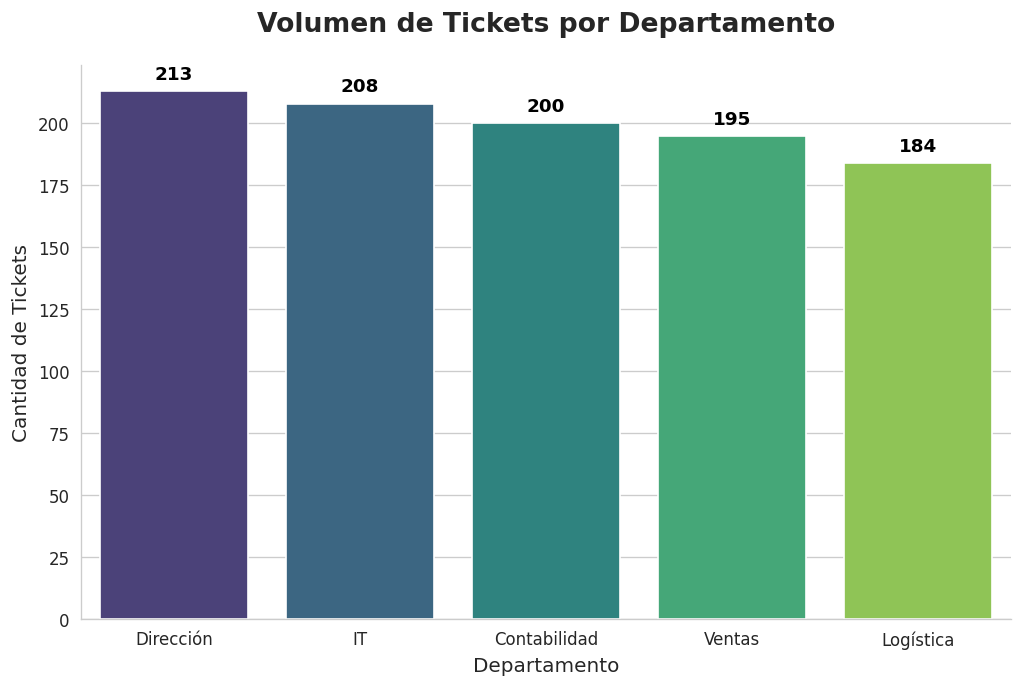

In [2]:
plt.figure(figsize=(10, 6))

# Crear el gráfico
ax = sns.countplot(data=df_clean, x='Departamento', order=df_clean['Departamento'].value_counts().index, palette='viridis')

# Títulos y Etiquetas
plt.title('Volumen de Tickets por Departamento', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Cantidad de Tickets', fontsize=12)
plt.xticks(fontsize=10)

# Quitar el marco superior y derecho (estilo minimalista)
sns.despine()

# Añadir los números encima de las barras (Data Labels)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11, fontweight='bold', color='black')

plt.show()

/tmp/ipython-input-2327113680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Prioridad', y='Horas_Resolucion', order=orden_prioridad, palette="coolwarm", linewidth=1.5)


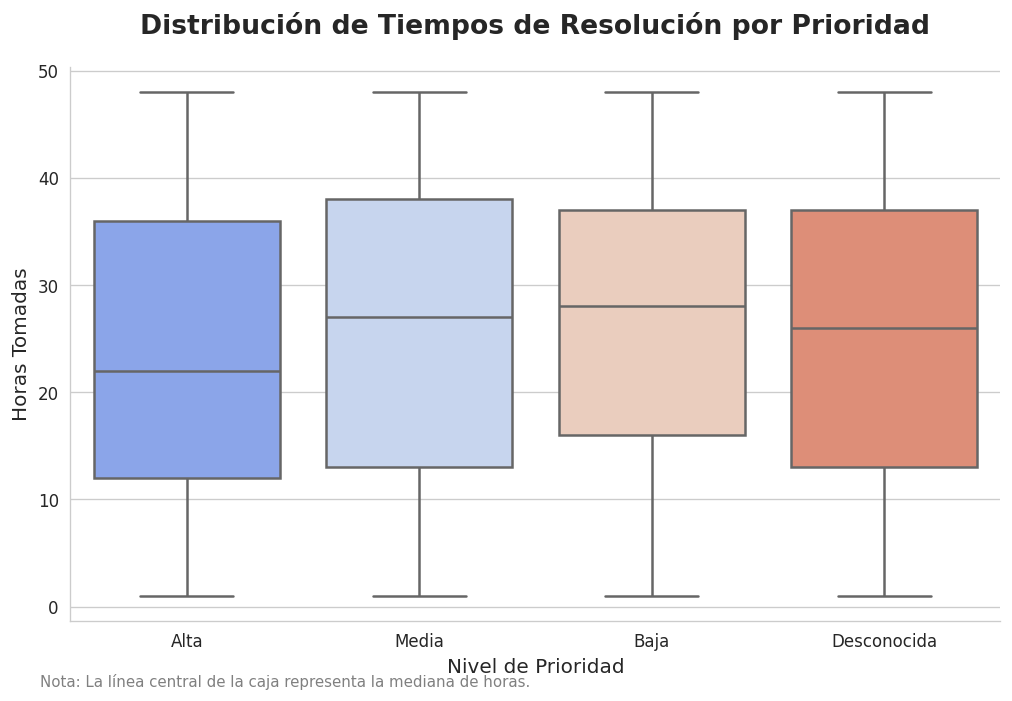

In [3]:
plt.figure(figsize=(10, 6))

# Ordenamos las prioridades lógicamente
orden_prioridad = ['Alta', 'Media', 'Baja', 'Desconocida']

# Crear Boxplot
sns.boxplot(data=df_clean, x='Prioridad', y='Horas_Resolucion', order=orden_prioridad, palette="coolwarm", linewidth=1.5)

# Títulos
plt.title('Distribución de Tiempos de Resolución por Prioridad', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Nivel de Prioridad', fontsize=12)
plt.ylabel('Horas Tomadas', fontsize=12)

# Nota explicativa pequeña
plt.figtext(0.1, 0.02, "Nota: La línea central de la caja representa la mediana de horas.", fontsize=9, color='gray')

sns.despine()
plt.show()

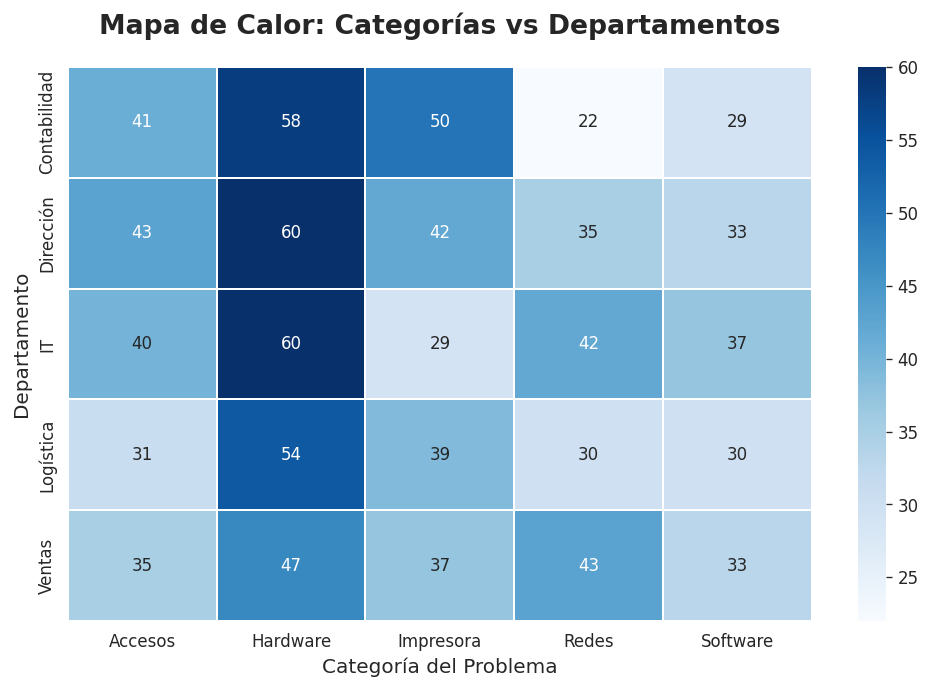

In [6]:
# 1. Preparamos una tabla cruzada (Matriz)
matriz_incidencias = pd.crosstab(df_clean['Departamento'], df_clean['Categoria'])

plt.figure(figsize=(10, 6))

# 2. Dibujamos el Heatmap
sns.heatmap(matriz_incidencias, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='white')

plt.title('Mapa de Calor: Categorías vs Departamentos', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Departamento', fontsize=12)
plt.xlabel('Categoría del Problema', fontsize=12)

plt.show()